# Central Limit Theorem and Sampling Distributions

- The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger, no matter what the shape of the population distribution
- The more samples, and the larger the samples, the more the graph of the sample means will look like a normal distribution
-  Average of sample means will be the population mean. If all of the samples means are added up, the average will be the actual population mean
- The sample standard deviation will always go down (Larger the sample size, lower the SD)
    - Theoretical SD of Sample Mean: sigma/sqrt(n)

### All possible samples
- n = count of population
- r = sample size
- C = n! / r!(n-r)!

#### Example: 6 objects
- r1 = 6! / 1!5! = 6
- r2 = 6! / 2!4! = 15
- r3 = 6! / 3!3!= 20
- r4 = 6! / 4!2! = 15
- r5 = 6! / 5!1! = 6
- r6 = 6! / 6!0! = 1

## Example: Student IQ
- Mean = 100
- SD = 15
- Normally Distributed

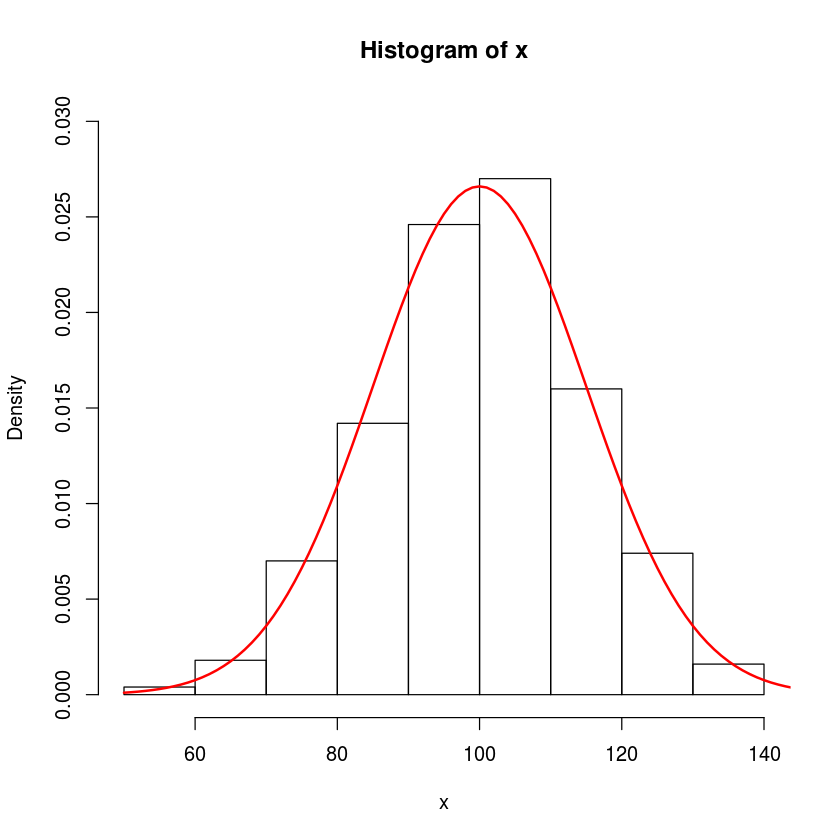

In [43]:
x <- rnorm(500, mean=100, sd=15)
hist(x, prob=TRUE, ylim=c(0,0.03)) #ylim=c(0,0.03): y-axis to 0 - 0.03
curve(dnorm(x, mean=100, sd=15), 50, 150, add=TRUE, lwd=2, col="red") #adds a normal distribution curve
#x-axis: 50-150 (optional)
#lwd=2, specifies thickness

In [44]:
mean(x)

[1] 100.2139

- Mean close to 100

### Sample size = 9.  Compute Mean of  sample (xbar)

In [41]:
x <- rnorm(9, mean=100, sd=15)
mean(x)

[1] 99.47865

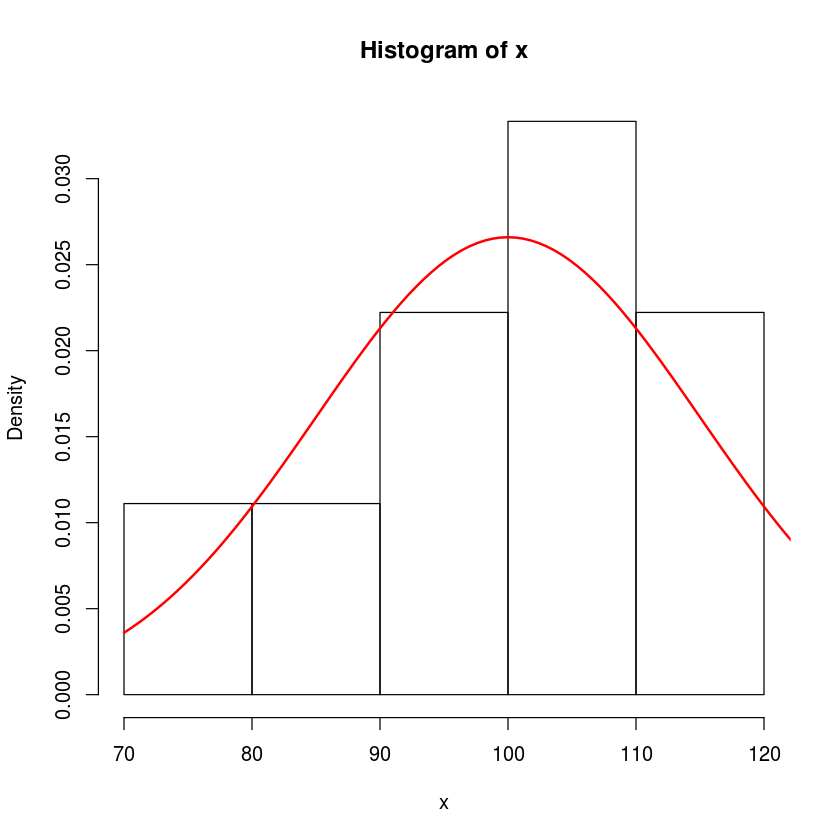

In [42]:
hist(x, prob=TRUE) 
curve(dnorm(x, mean=100, sd=15), 70, 130, add=TRUE, lwd=2, col="red") 

### Build Sampling Distribution:
- Sample size = 9
- Number of samples = 20
- Mean = 100
- Sigma (SD) = 15

In [62]:
mu <- 100
sigma <- 15
n <- 9

#### Create empty vector of zeros, with 9 elements containing zeros

In [63]:
xbar <- rep(0, 20)
xbar

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Use a loop to take Mean of 20 samples from the parent population (insert each into a new vector xbar)
- Sample Size = 9

In [64]:
for (i in 1:20){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [65]:
xbar

[1]  98.85278 101.41407 107.14585  98.35599 104.59103 104.54775  96.24823
 [8] 100.88101  96.95706  97.86241  94.65858 102.23870  97.40196 106.18612
[15] 100.97769 100.66979  97.66962  99.08186 109.49869 104.21831

#### Compute mean of xbar

In [66]:
mean(xbar)

[1] 100.9729

- Mean of Means is very close to the actual Mean (100)

#### Plot in histogram 

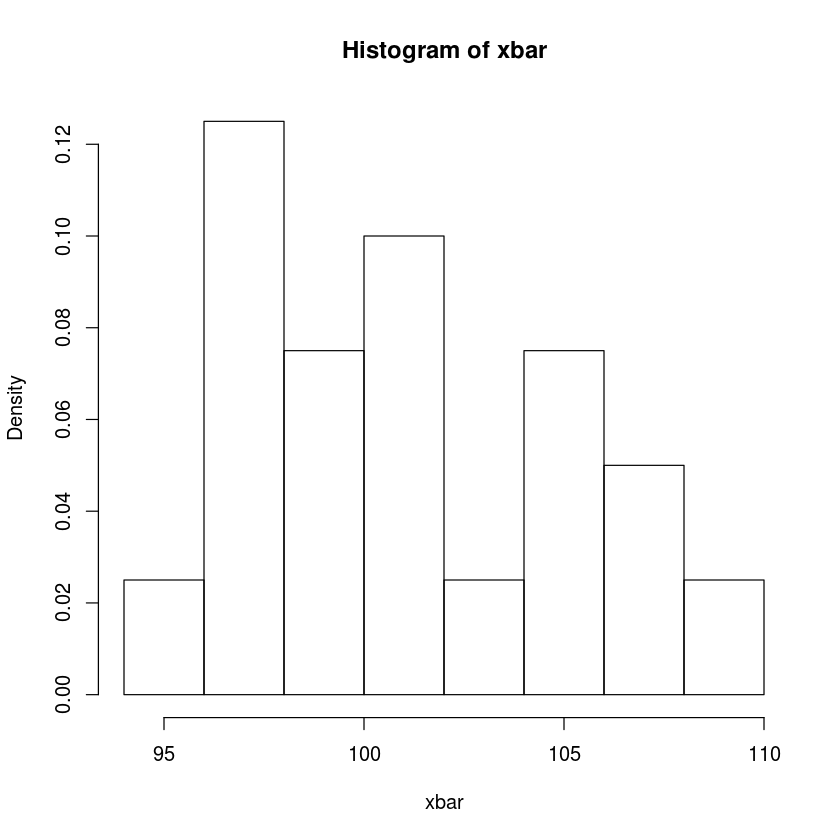

In [78]:
hist(xbar, prob=TRUE) 

### Compare with 10,000 samples
- Sample size = 9

In [87]:
xbar <- rep(0, 10000)
for (i in 1:10000){
    xbar[i] <- mean(rnorm(n, mean=mu, sd=sigma))
}

In [88]:
mean(xbar)

[1] 99.98387

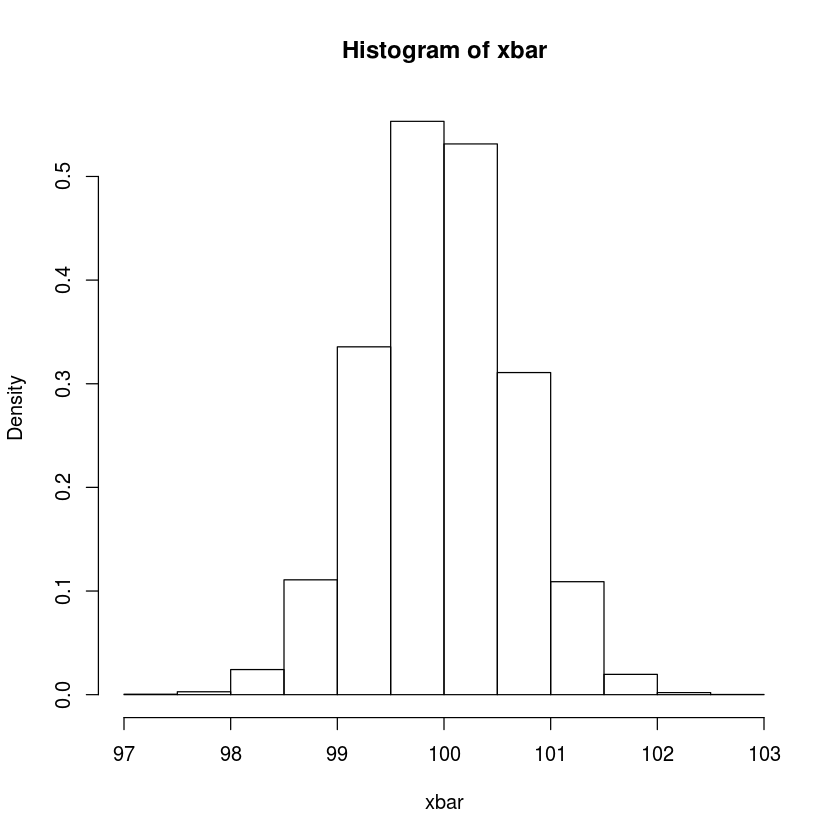

In [92]:
hist(xbar, prob=TRUE) 